 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path('./whale_returns.csv')
wr_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)



wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wr_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
wr_df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_daily_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_returns_df['Close'] =sp500_returns_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_returns_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns=sp500_daily_returns.dropna().copy()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns=sp500_daily_returns.rename(columns={"Close":"sp500"})
sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_return = pd.concat([wr_df, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

(            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
 Date                                                        
 2015-03-03                  -0.001266           -0.004981   
 2015-03-04                   0.002230            0.003241   
 2015-03-05                   0.004016            0.004076   
 2015-03-06                  -0.007905           -0.003574   
 2015-03-09                   0.000582            0.004225   
 ...                               ...                 ...   
 2019-04-25                  -0.000285           -0.001291   
 2019-04-26                   0.008149            0.009162   
 2019-04-29                   0.001254            0.002719   
 2019-04-30                  -0.001295           -0.002211   
 2019-05-01                  -0.005847           -0.001341   
 
             TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
 Date                                                             
 2015-03-03                    -0.000496               -0.

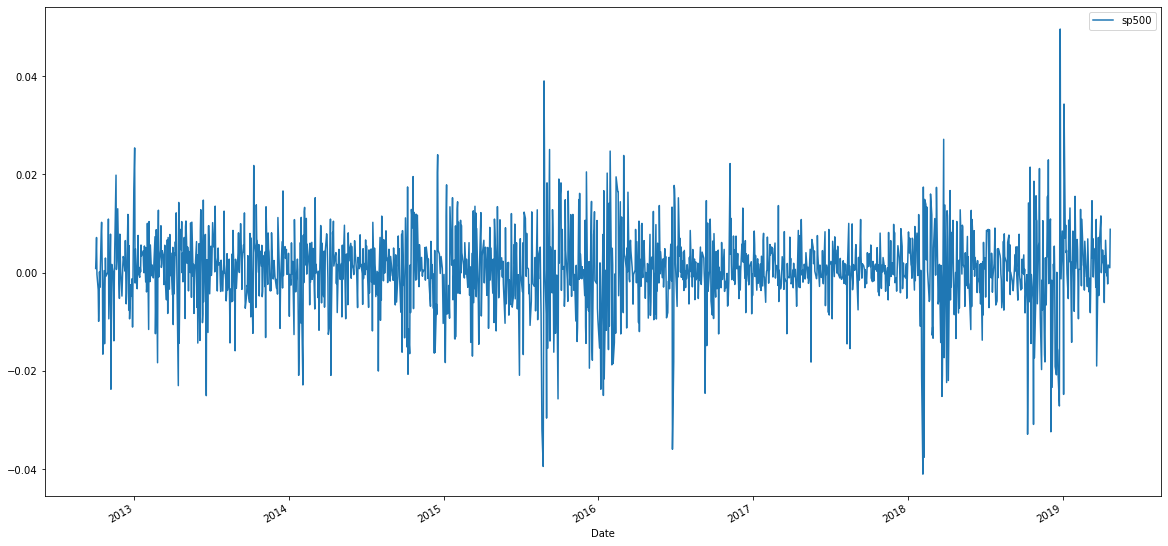

In [15]:
# Plot daily returns of all portfolios
wr_df, sp500_daily_returns.plot(figsize= (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

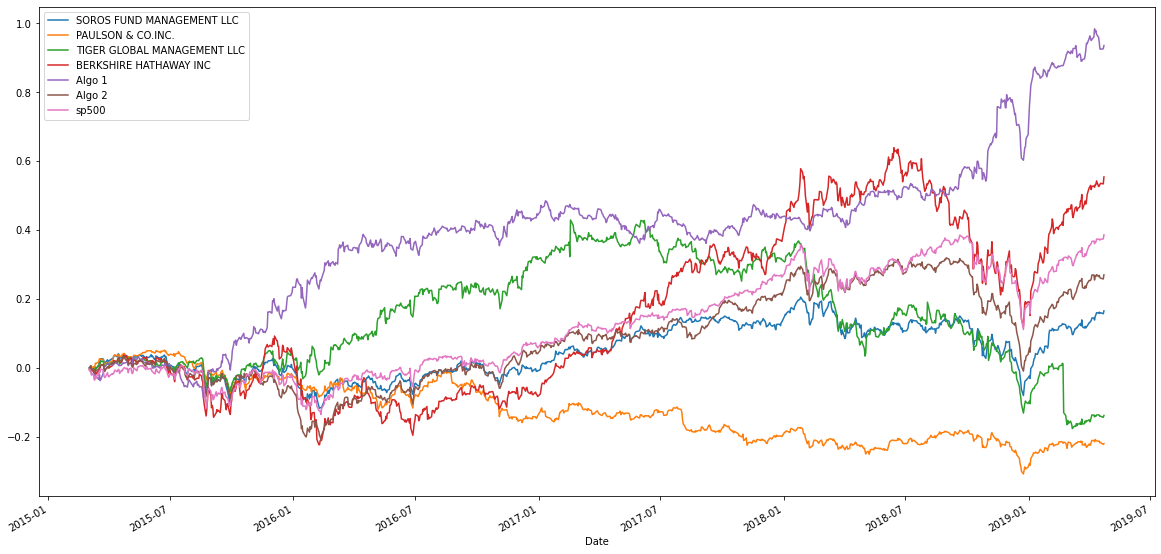

In [16]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative_returns = (1 + all_portfolio_return.sort_index()).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

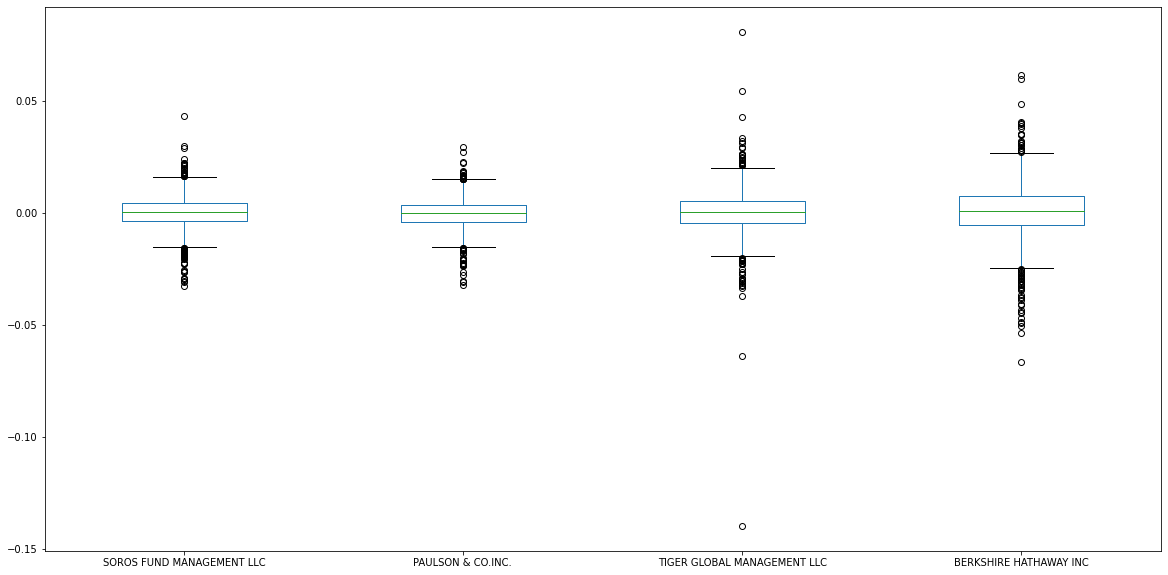

In [17]:
# Box plot to visually show risk
wr_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

<AxesSubplot:>

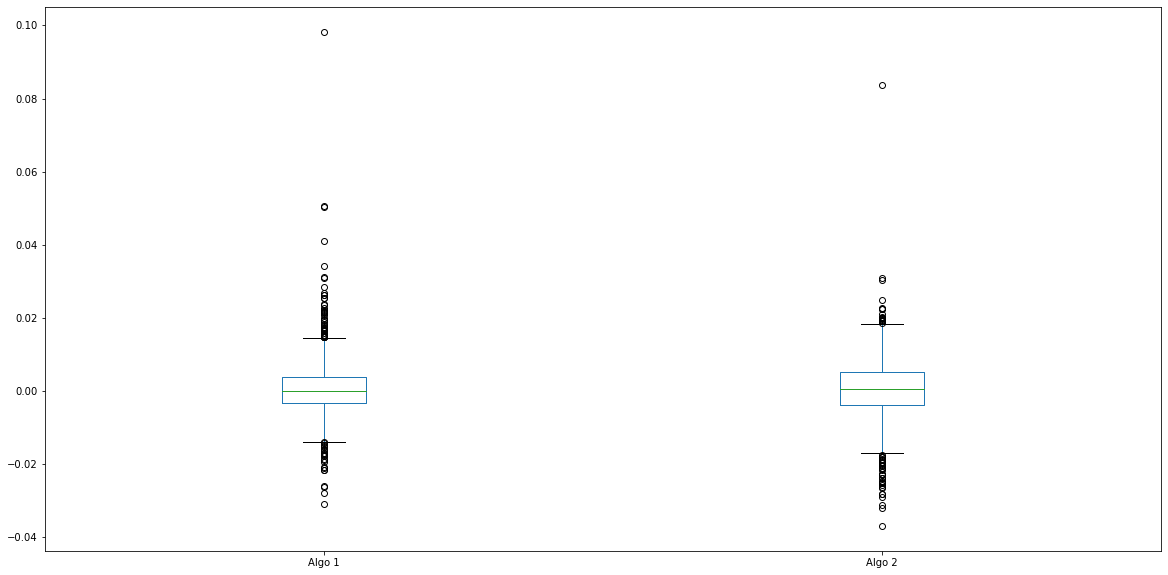

In [18]:
algo_daily_returns.plot.box(figsize=(20,10))

<AxesSubplot:>

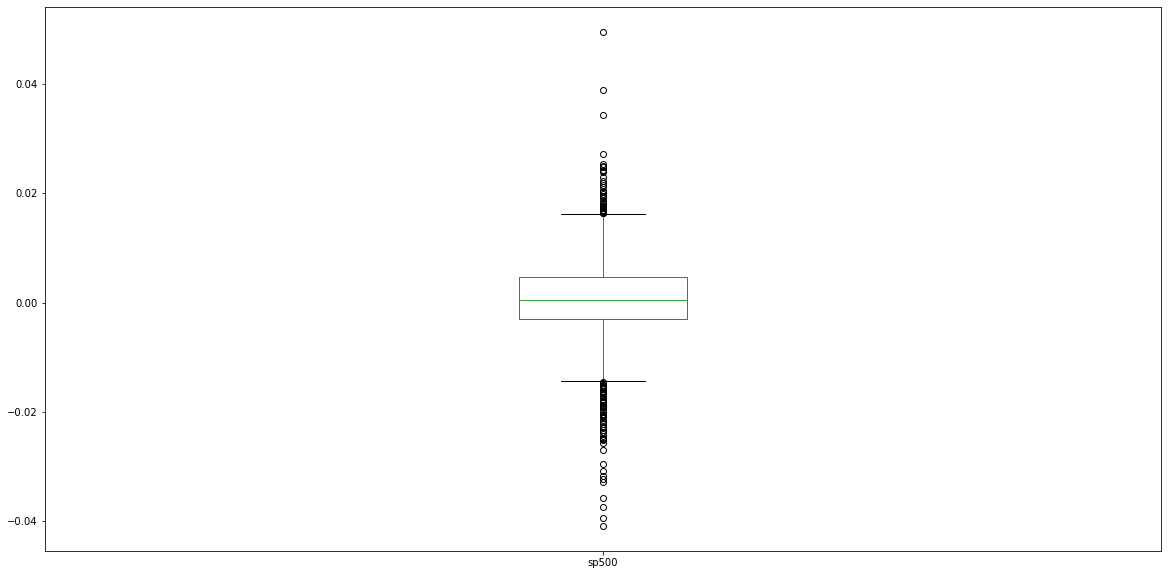

In [19]:
sp500_daily_returns.plot.box(figsize=(20,10))

In [20]:
# Calculate the daily standard deviations of all portfolios
wr_df, algo_daily_returns, sp500_daily_returns = wr_df, algo_daily_returns, sp500_daily_returns.std()
wr_df, algo_daily_returns, sp500_daily_returns


(            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
 Date                                                        
 2015-03-03                  -0.001266           -0.004981   
 2015-03-04                   0.002230            0.003241   
 2015-03-05                   0.004016            0.004076   
 2015-03-06                  -0.007905           -0.003574   
 2015-03-09                   0.000582            0.004225   
 ...                               ...                 ...   
 2019-04-25                  -0.000285           -0.001291   
 2019-04-26                   0.008149            0.009162   
 2019-04-29                   0.001254            0.002719   
 2019-04-30                  -0.001295           -0.002211   
 2019-05-01                  -0.005847           -0.001341   
 
             TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
 Date                                                             
 2015-03-03                    -0.000496               -0.

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
all_portfolio_return.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = all_portfolio_return["sp500"].std()
all_portfolio_return.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = wr_df, algo_daily_returns, sp500_daily_returns * np.sqrt(252)
annualized_std

(            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
 Date                                                        
 2015-03-03                  -0.001266           -0.004981   
 2015-03-04                   0.002230            0.003241   
 2015-03-05                   0.004016            0.004076   
 2015-03-06                  -0.007905           -0.003574   
 2015-03-09                   0.000582            0.004225   
 ...                               ...                 ...   
 2019-04-25                  -0.000285           -0.001291   
 2019-04-26                   0.008149            0.009162   
 2019-04-29                   0.001254            0.002719   
 2019-04-30                  -0.001295           -0.002211   
 2019-05-01                  -0.005847           -0.001341   
 
             TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
 Date                                                             
 2015-03-03                    -0.000496               -0.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

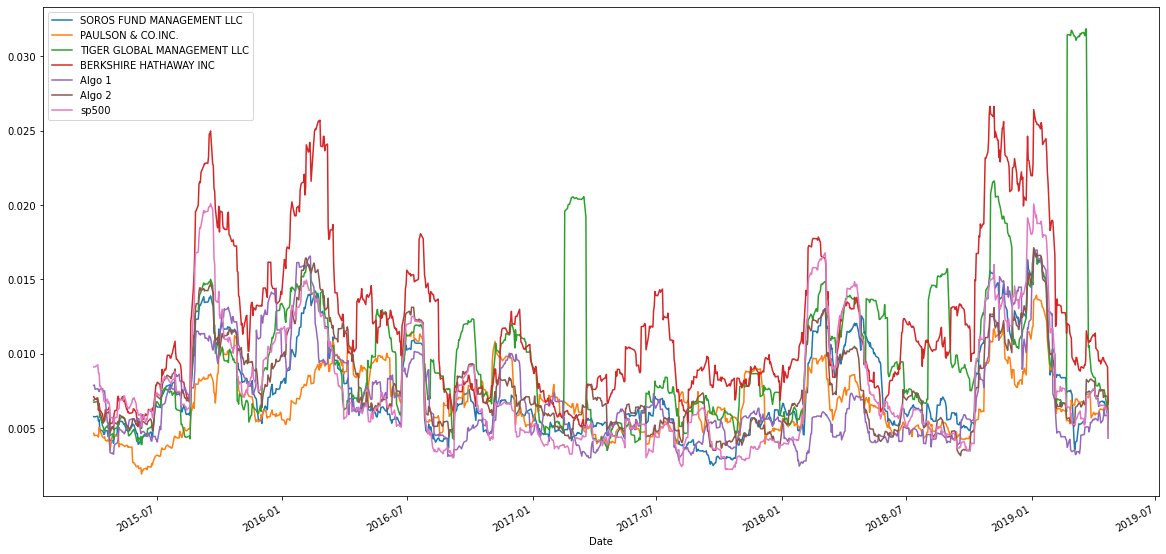

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
all_portfolio_return.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

<AxesSubplot:>

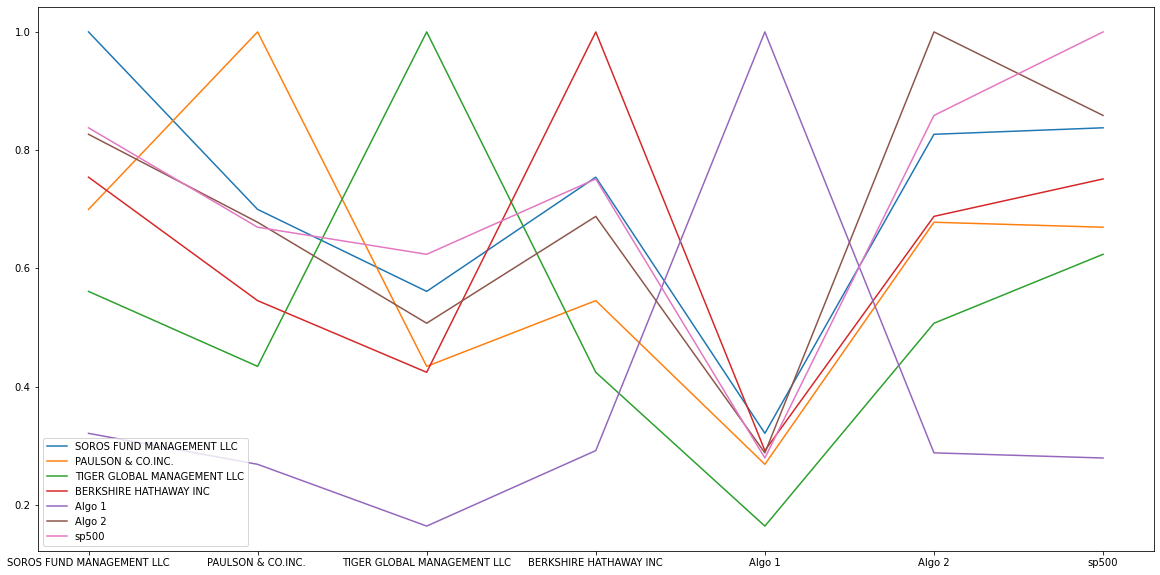

In [25]:
# Calculate the correlation

# Display de correlation matrix
all_portfolio_return.corr().plot(figsize=(20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [26]:
# Calculate covariance of a single portfolio
covariance_bh = all_portfolio_return['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(all_portfolio_return['sp500'])




In [27]:
# Calculate variance of S&P 500
variance_sp500 = all_portfolio_return['sp500'].rolling(window=60).var()

In [28]:
# Computing beta
rolling_beta_bh = covariance_bh/variance_sp500

<AxesSubplot:title={'center':'rolling 60 day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

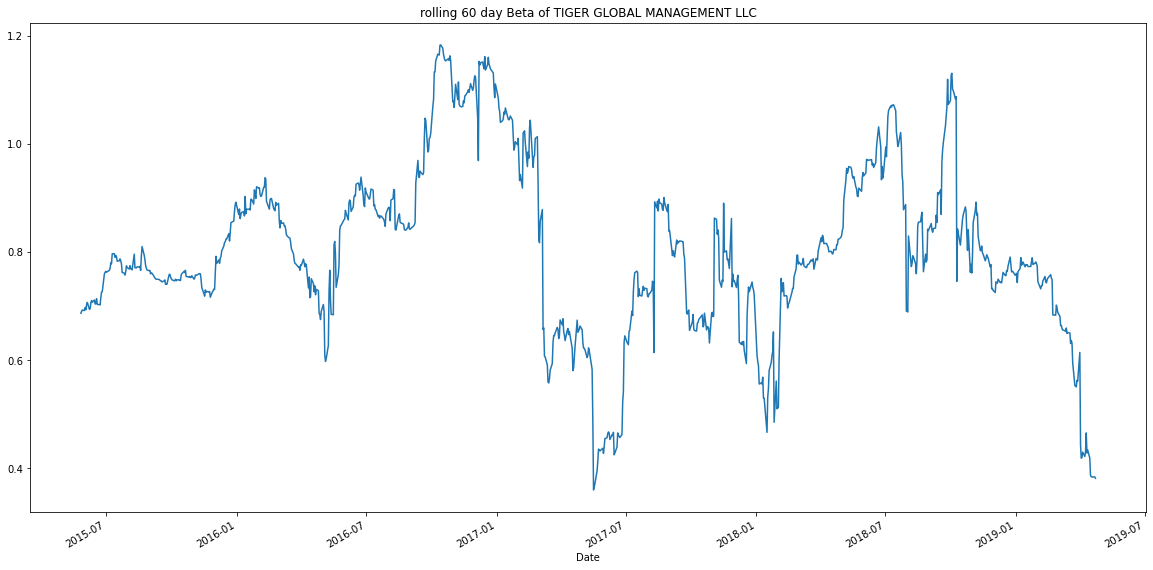

In [29]:
# Plot beta trend
rolling_beta_bh.plot(figsize=(20,10), title='rolling 60 day Beta of TIGER GLOBAL MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
all_portfolio_return.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio_return.mean() * 252) / (all_portfolio_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'sharpe ratio'}>

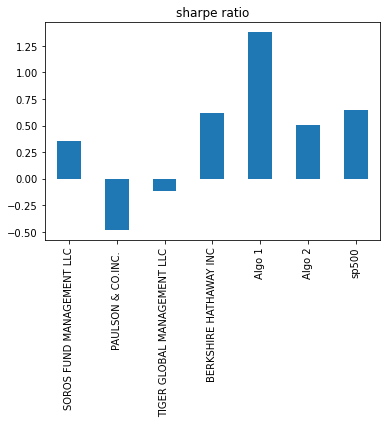

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title='sharpe ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
goog_path = Path("./goog_historical.csv")
goog_path_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_path_df =goog_path_df.rename(columns={"NOCP":"goog"})
goog_path_df.head()

,Symbol,goog
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [34]:
# Reading data from 2nd stock
aapl_path = Path("./aapl_historical.csv")
aapl_path_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_path_df =aapl_path_df.rename(columns={"NOCP":"aapl"})
aapl_path_df.head()


,Symbol,aapl
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [35]:
# Reading data from 3rd stock
cost_path = Path("./cost_historical.csv")
cost_path_df = pd.read_csv(cost_path,  index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_path_df =cost_path_df.rename(columns={"NOCP":"cost"})
cost_path_df.head()


,Symbol,cost
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [36]:
# Combine all stocks in a single DataFrame
portfolio_returns = pd.concat([goog_path_df, aapl_path_df, cost_path_df], axis='rows', join='inner')
#portfolio_returns.colums= ['GOOG', 'AAPL', 'COST', ]                             
portfolio_returns.head()

,Symbol
Trade DATE,
2019-05-09,GOOG
2019-05-08,GOOG
2019-05-07,GOOG
2019-05-06,GOOG
2019-05-03,GOOG


In [37]:
# Reset Date index
portfolio_returns_df=portfolio_returns.reset_index()
portfolio_returns_df.head()

,Trade DATE,Symbol
0,2019-05-09,GOOG
1,2019-05-08,GOOG
2,2019-05-07,GOOG
3,2019-05-06,GOOG
4,2019-05-03,GOOG


In [38]:
# Reorganize portfolio data by having a column per symbol 
portfolio_return_df = pd.concat([goog_path_df, aapl_path_df, cost_path_df], axis='columns', join='inner')
#portfolio_return.colums = ['goog', 'aapl', 'cost']
portfolio_return_df.drop('Symbol', axis=1, inplace=True)
portfolio_return_df.head()

,goog,aapl,cost
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [39]:
# Calculate daily returns
daily_returns = portfolio_return_df.pct_change()


In [40]:
# Drop NAs
daily_returns = daily_returns.dropna().copy()

In [41]:
# Display sample data
daily_returns.head()

,goog,aapl,cost
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [43]:
# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

In [44]:
# Display sample data
weighted_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns_df = pd.concat([weighted_returns, all_portfolio_return, ], axis='columns', join='inner')
portfolio_returns_df.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compare_returns = portfolio_returns_df.dropna().copy()
compare_returns.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annualized_std = compare_returns, sp500_daily_returns * np.sqrt(252)
annualized_std


(                   0  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
 2019-04-23 -0.000415                   0.007167            0.003485   
 2019-04-22 -0.011812                  -0.002586           -0.007333   
 2019-04-18 -0.001148                   0.001448            0.001222   
 2019-04-17 -0.001541                  -0.002897           -0.006467   
 2019-04-16 -0.009149                   0.002699            0.000388   
 ...              ...                        ...                 ...   
 2018-05-17  0.006112                  -0.001955            0.002524   
 2018-05-16  0.001618                   0.008637            0.006244   
 2018-05-15 -0.009283                  -0.000726           -0.001409   
 2018-05-14  0.010216                   0.000000            0.000000   
 2018-05-11 -0.000012                  -0.004717            0.000982   
 
             TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
 2019-04-23                     0.006472                

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

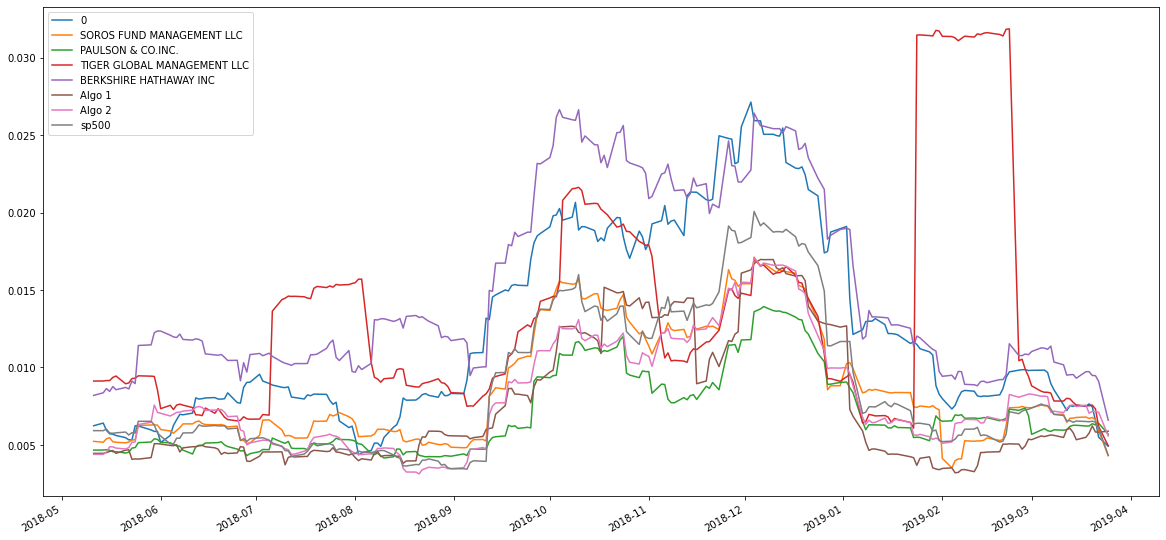

In [48]:
# Calculate rolling standard deviation
portfolio_returns_df.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

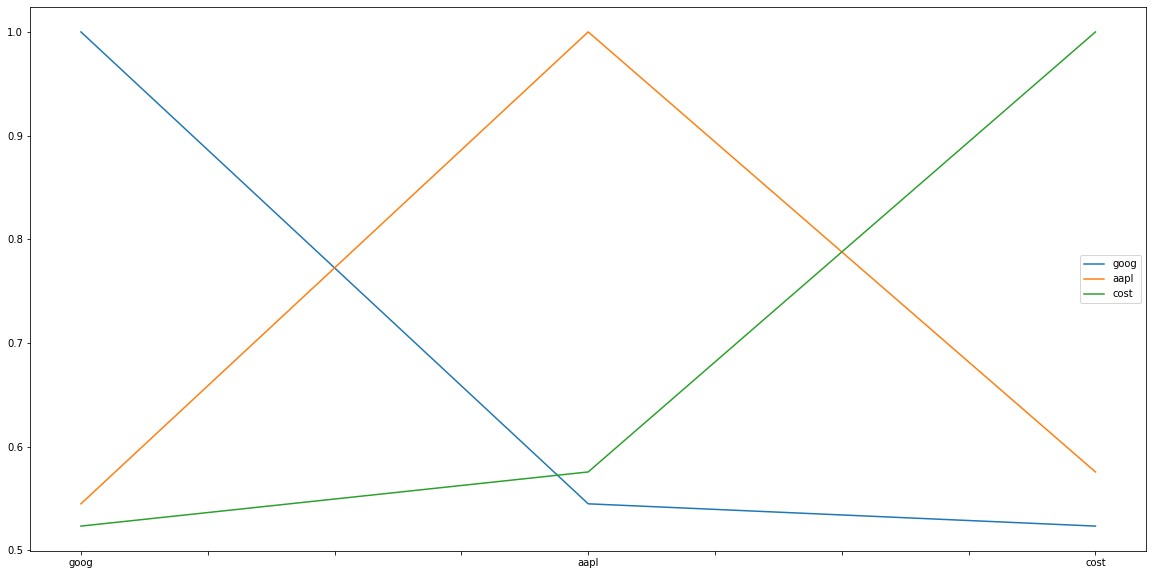

In [50]:
# Calculate and plot the correlation
portfolio_return_df.corr().plot(figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'rolling 60 day Beta of portfolio'}, xlabel='Date'>

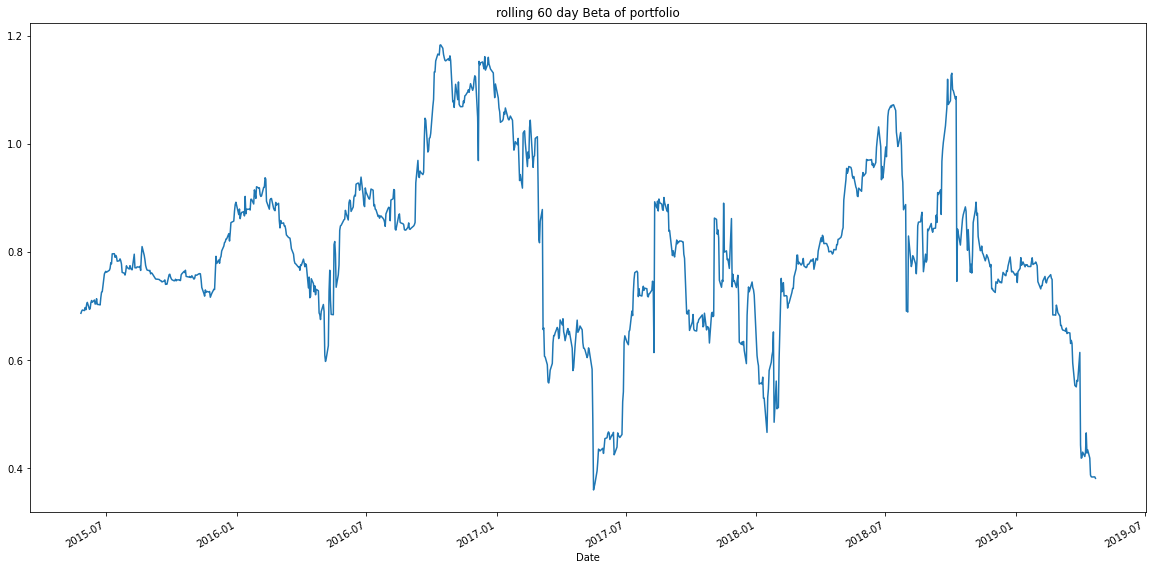

In [51]:
# Calculate and plot Beta
rolling_beta_bh.plot(figsize=(20,10), title='rolling 60 day Beta of portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = (portfolio_return_df.mean() * 252) / (portfolio_return_df.std() * np.sqrt(252))
sharpe_ratios_2

goog    266.090554
aapl    141.987456
cost    244.268994
dtype: float64

<AxesSubplot:title={'center':'sharpe ratio'}>

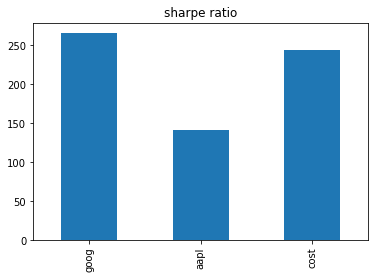

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = 'bar', title='sharpe ratio')

### How does your portfolio do?

Write your answer here!

### My portfolio is performing better than all other portfolios.